# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Project ini merupakan capstone project dari Algoritma Academy Data Analytics Specialization. Dalam project ini, dilakukan Webscraping menggunakan BeautifulSoup.Tujuan dari WebScraping ini adalah mengambil data Kurs USD selama 6 Bulan Terakhir yang selanjutnya akan kita analisis fluktuasi Harian/Mingguan/Bulanan serta perbandingan Value pada periode tertentu.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [275]:
import requests
import pandas as pd

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')
url_get

<Response [200]>

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [276]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [277]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [278]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

Dari hasil script HTML halaman web, perlu dicari informasi yang ingin diambil (tabel historical kurs) :
1. Inspect tabel dari halaman web
2. Ambil 'tag' yang menunjukkan lokasi tabel seutuhnya

In [279]:
table = soup.find('table', attrs={'class':'history-rates-data'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-12-15">
     December 15, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-12-15">
     2023-12-15
    </a>
   </td>
   <td>
    <span class="w">
     <span clas


Finding row length.

In [280]:
# mengambil Date
table.find_all('a',attrs={'class':'w'})[:5]

[<a class="w" href="/exchange-rate-history/usd-idr-2023-12-15">December 15, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-12-14">December 14, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-12-13">December 13, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-12-12">December 12, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-12-11">December 11, 2023</a>]

In [281]:
# mengambil US Dollar to IDR
table.find_all('span',attrs={'class':'w'})[:5]

[<span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,529</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,476</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,360</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,576</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,653</span></span>]

In [282]:
# cari jumlah row/baris
row = table.find_all('a',attrs={'class':'w'})
row_length = len(row)
row_length

130

Do the scrapping process here

Setelah ketemu pola yang akan kita gunakan untuk mengambil data yang dibutuhkan (yaitu hari dan kurs), kita akan ambil seluruh data pada all row dengan cara looping

In [283]:
temp = [] #initiating a tuple

for i in range(1, row_length):

    #ambil period
    period = table.find_all('a', attrs={'class' : 'w'})[i].text
    period = period.strip()

    #ambil nominal kurs
    kurs_usd = table.find_all('span', attrs={'class' : 'w'})[i].text
    kurs_usd = kurs_usd.strip()

    temp.append((period, kurs_usd))

# urutan ascending 
temp = temp[::-1]
temp 

[('June 19, 2023', '$1 = Rp15,014'),
 ('June 20, 2023', '$1 = Rp15,015'),
 ('June 21, 2023', '$1 = Rp14,945'),
 ('June 22, 2023', '$1 = Rp14,939'),
 ('June 23, 2023', '$1 = Rp15,045'),
 ('June 26, 2023', '$1 = Rp15,045'),
 ('June 27, 2023', '$1 = Rp14,988'),
 ('June 28, 2023', '$1 = Rp14,985'),
 ('June 29, 2023', '$1 = Rp15,059'),
 ('June 30, 2023', '$1 = Rp15,040'),
 ('July 3, 2023', '$1 = Rp15,063'),
 ('July 4, 2023', '$1 = Rp15,020'),
 ('July 5, 2023', '$1 = Rp15,078'),
 ('July 6, 2023', '$1 = Rp15,178'),
 ('July 7, 2023', '$1 = Rp15,162'),
 ('July 10, 2023', '$1 = Rp15,187'),
 ('July 11, 2023', '$1 = Rp15,140'),
 ('July 12, 2023', '$1 = Rp14,935'),
 ('July 13, 2023', '$1 = Rp14,954'),
 ('July 14, 2023', '$1 = Rp15,003'),
 ('July 17, 2023', '$1 = Rp14,972'),
 ('July 18, 2023', '$1 = Rp14,989'),
 ('July 19, 2023', '$1 = Rp15,009'),
 ('July 20, 2023', '$1 = Rp15,056'),
 ('July 21, 2023', '$1 = Rp15,043'),
 ('July 24, 2023', '$1 = Rp15,022'),
 ('July 25, 2023', '$1 = Rp15,027'),
 ('Jul

## Creating data frame & Data wrangling

Put the array into dataframe

In [284]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('period','kurs_usd'))
df.head()

,period,kurs_usd
0,"June 19, 2023","$1 = Rp15,014"
1,"June 20, 2023","$1 = Rp15,015"
2,"June 21, 2023","$1 = Rp14,945"
3,"June 22, 2023","$1 = Rp14,939"
4,"June 23, 2023","$1 = Rp15,045"


In [285]:
df.dtypes

period      object
kurs_usd    object
dtype: object

Do the data cleaning here
1. Pastikan tipe data sudah benar. Dalam kasus ini, tipe data harus dirubah period -> datetime , kurs-> float64
2. Namun untuk data kurs, data masih bercampur antara text dan nominal jadi harus di"bersihkan" dengan membuang text dan koma 

In [286]:

df_new = df.copy()

# 1. ubah tipe data period
df_new['period'] = df_new['period'].astype('datetime64[ns]')

# 2. ambil nominal di kurs, ubah type data ke numerik
df_new['kurs_usd'] = df_new['kurs_usd'].replace('\$1 = Rp','',regex=True).replace(',','',regex=True)
df_new['kurs_usd'] = df_new['kurs_usd'].astype('float64')
df_new

,period,kurs_usd
0,2023-06-19,15014.0
1,2023-06-20,15015.0
2,2023-06-21,14945.0
3,2023-06-22,14939.0
4,2023-06-23,15045.0
...,...,...
124,2023-12-08,15573.0
125,2023-12-11,15653.0
126,2023-12-12,15576.0
127,2023-12-13,15360.0


Data visualisation
Tren pergerakan selama 6 bulan terakhir divisualisasikan menggunakan lineplot

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [287]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [288]:
plt.style.use('seaborn-v0_8-paper')

<Axes: title={'center': 'Tren Pergerakan Kurs USD to IDR'}, xlabel='Time', ylabel='Kurs IDR'>

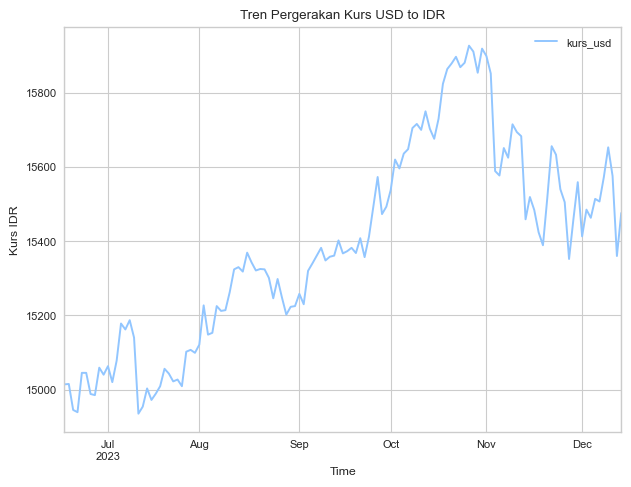

In [289]:
df_new = df_new.set_index('period')
df_new.plot(
            title= 'Tren Pergerakan Kurs USD to IDR',
            xlabel= 'Time',
            ylabel= 'Kurs IDR'
            )

In [290]:
df_new.describe()

,kurs_usd
count,129.000000
mean,15386.767442
std,270.314588
min,14935.000000
25%,15178.000000
50%,15367.000000
75%,15577.000000
max,15927.000000


In [291]:
# Kurs tertinggi
df_new.sort_values(by='kurs_usd', ascending=False).head(5)

,kurs_usd
period,
2023-10-26,15927.0
2023-10-31,15919.0
2023-10-27,15911.0
2023-11-01,15899.0
2023-10-23,15897.0


In [292]:
# Kurs terendah
df_new.sort_values(by='kurs_usd', ascending=True).head(5)

,kurs_usd
period,
2023-07-12,14935.0
2023-06-22,14939.0
2023-06-21,14945.0
2023-07-13,14954.0
2023-07-17,14972.0


## Analysis and Conclusion

1. Nilai mean di 6 bulan terakhir (Jul 23 - Des 23) adalah Rp15.388/USD.
2. Nilai Rupiah mulai melemah (menurun) terhadap nilai USD dari bulan Juli 2023.
3. Rupiah menyentuh angka terendah pada tanggal 12 Juli 2023 yaitu Rp14.935/USD.
4. Rupiah menyentuh angka Rp15.927/USD pada tanggal 26 Oktober (peak).
5. Pada tanggal 15 Des 2023, kurs Rupiah ditutup pada angka Rp15.529/USD.

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.

In [293]:
# Simpan file
df_new.to_pickle('ExchangeKursUSD') # python
df_new.to_csv('ExchangeKursUSD.csv') # csv